In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import re 
import string
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pickle
from textblob import TextBlob

In [2]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [3]:
df=pd.read_csv('./datasets/positive_reddit_combined.csv')



In [4]:
df.shape

(362918, 3)

In [5]:
df.head()

,Unnamed: 0,subreddit,post
0,0,addiction,decide go tramadol well never take tablet life...
1,1,addiction,vyvans addict get pretty bad yesterday go with...
2,2,addiction,quit coke nicotine im gon na start say ive rea...
3,3,addiction,ok lead drug addict love mani detail gf little...
4,4,addiction,brother problem im weed think much anyth cant ...


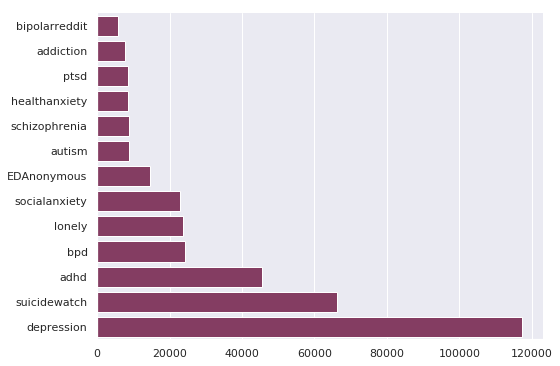

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotează histograma
plt.figure(figsize=(8, 6))
sorted_counts = df['subreddit'].value_counts().sort_values(ascending=True) # Sortează valorile în ordine descrescătoare
colors = ['#903163'] # Listează culorile dorite în ordinea dorită

sns.barplot(x=sorted_counts.values, y=sorted_counts.index, palette=colors)
sns.despine()

plt.show()

In [7]:
df.head()

,Unnamed: 0,subreddit,post
0,0,addiction,decide go tramadol well never take tablet life...
1,1,addiction,vyvans addict get pretty bad yesterday go with...
2,2,addiction,quit coke nicotine im gon na start say ive rea...
3,3,addiction,ok lead drug addict love mani detail gf little...
4,4,addiction,brother problem im weed think much anyth cant ...


In [8]:
df['subreddit'].value_counts().index

Index([u'depression', u'suicidewatch', u'adhd', u'bpd', u'lonely',
       u'socialanxiety', u'EDAnonymous', u'autism', u'schizophrenia',
       u'healthanxiety', u'ptsd', u'addiction', u'bipolarreddit'],
      dtype='object')

In [9]:
df = df.dropna(subset=['post'])
df = df.astype({'post': str})


In [10]:
df.shape

(362912, 3)

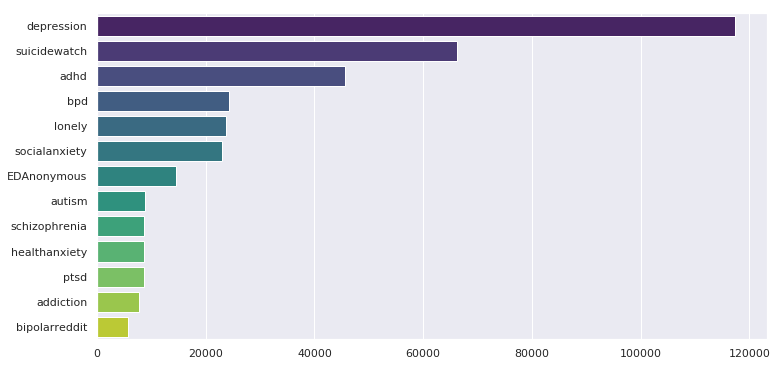

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotează histograma
plt.figure(figsize=(12, 6))
sns.barplot( x = df['subreddit'].value_counts().values, y = df['subreddit'].value_counts().index,palette= 'viridis')
plt.show()


In [12]:
df['subreddit'].value_counts().values.tolist()

[117328,
 66159,
 45630,
 24294,
 23635,
 22996,
 14577,
 8869,
 8712,
 8648,
 8643,
 7641,
 5780]

In [13]:
df['subreddit'].unique().tolist()

['addiction',
 'adhd',
 'autism',
 'bipolarreddit',
 'bpd',
 'depression',
 'EDAnonymous',
 'healthanxiety',
 'lonely',
 'ptsd',
 'schizophrenia',
 'socialanxiety',
 'suicidewatch']

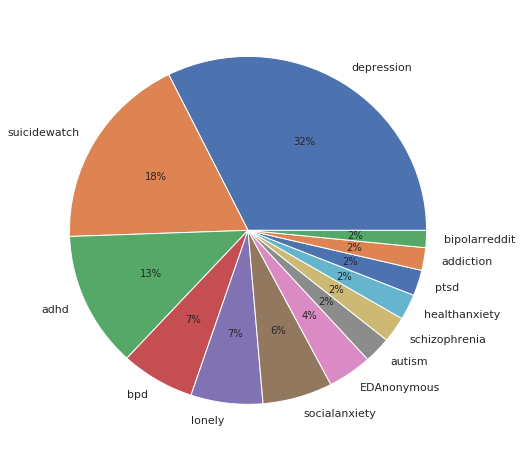

In [14]:
plt.figure(figsize=(8, 8))
plt.pie(df['subreddit'].value_counts().values.tolist(), 
        labels = df['subreddit'].value_counts().index.tolist(),
        autopct='%.0f%%')
plt.show()

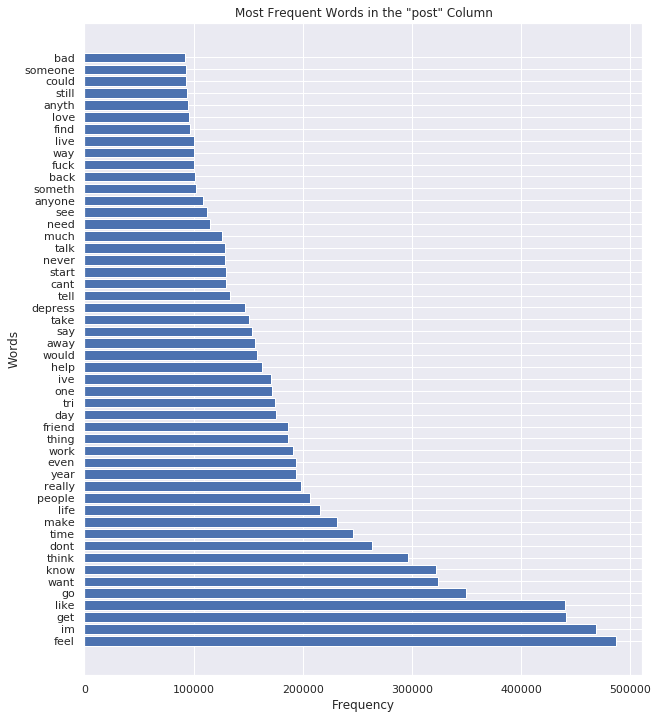

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

data = df

# Concatenate all the sentences from the "post" column
all_posts = ' '.join(data['post'].values.tolist())

# Tokenize words
tokens = word_tokenize(all_posts)

# Calculate word frequencies
freq_dist = FreqDist(tokens)

# Number of top words to display in the plot
num_top_words = 50

# Get the most frequent words and their frequencies
top_words = freq_dist.most_common(num_top_words)
top_words, frequencies = zip(*top_words)

# Convert words to Unicode strings
top_words = [str(word) for word in top_words]

# Plot the horizontal bar chart of the most frequent words
plt.figure(figsize=(10, 12))
plt.barh(top_words, frequencies)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Most Frequent Words in the "post" Column')
plt.show()


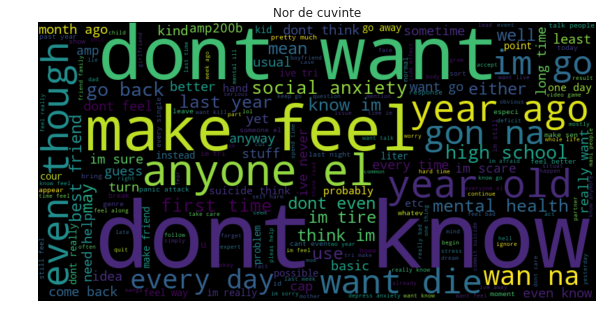

In [16]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Încarcă baza de date CSV
data = df
# Concatenează toate propozițiile într-un singur text
text = ' '.join(data['post'])

# Generează norul de cuvinte
wordcloud = WordCloud(width=800, height=400).generate(text)

# Plotează norul de cuvinte
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nor de cuvinte')
plt.show()


In [17]:
import pandas as pd
from collections import Counter

# Încarcă baza de date CSV
data = df

# Calculează numărul de cuvinte cel mai utilizat pentru fiecare etichetă
label_word_counts = {}
for label in data['subreddit'].unique():
    label_data = data[data['subreddit'] == label]
    all_words = ' '.join(label_data['post']).split()
    word_counts = Counter(all_words)
    most_common_word, count = word_counts.most_common(1)[0]
    label_word_counts[label] = count

# Afișează rezultatele
for label, count in label_word_counts.items():
    print(r"Eticheta {} are {} cuvinte.".format(label, count))


Eticheta healthanxiety are 10761 cuvinte.
Eticheta bpd are 40709 cuvinte.
Eticheta suicidewatch are 104813 cuvinte.
Eticheta EDAnonymous are 18023 cuvinte.
Eticheta socialanxiety are 30260 cuvinte.
Eticheta ptsd are 12219 cuvinte.
Eticheta schizophrenia are 9682 cuvinte.
Eticheta lonely are 32313 cuvinte.
Eticheta bipolarreddit are 7279 cuvinte.
Eticheta adhd are 63956 cuvinte.
Eticheta addiction are 11438 cuvinte.
Eticheta autism are 8741 cuvinte.
Eticheta depression are 205963 cuvinte.


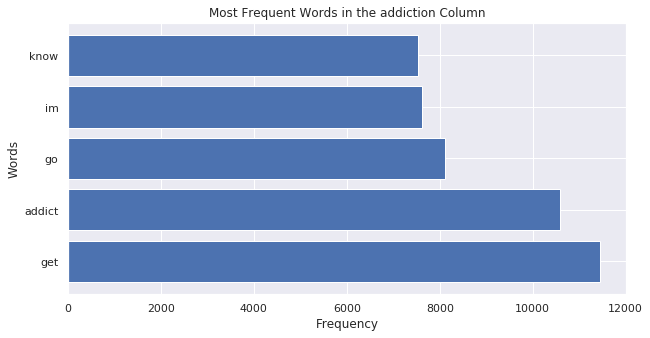

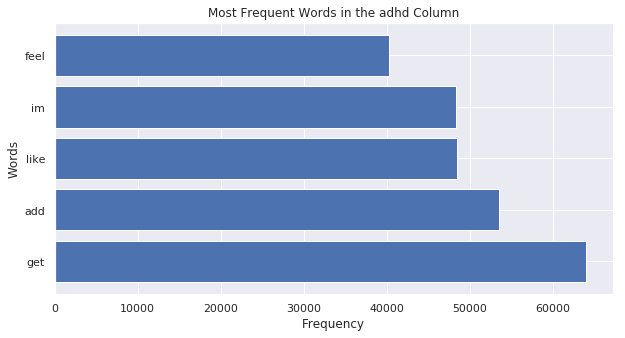

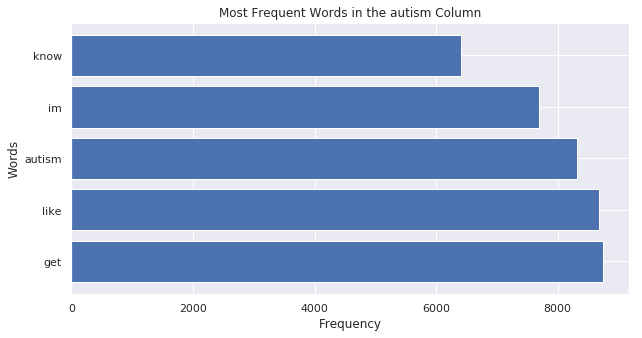

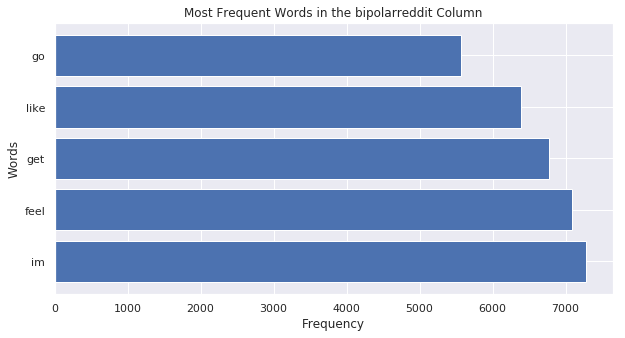

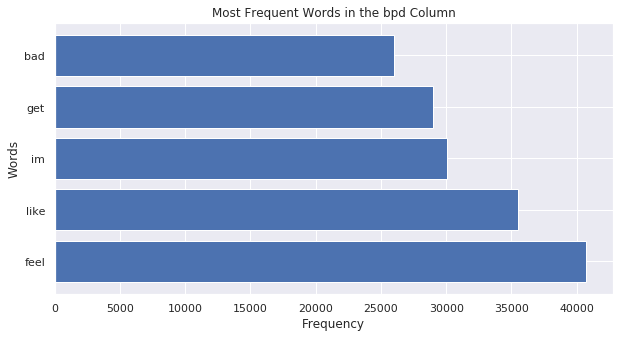

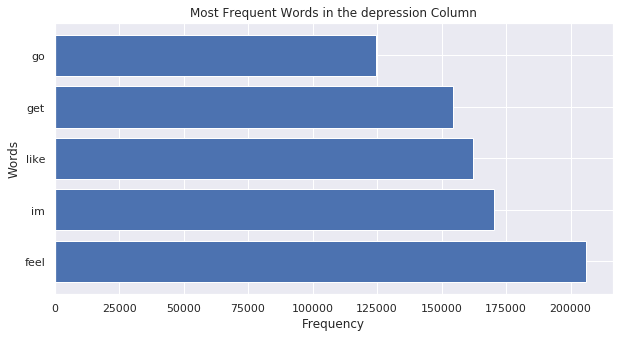

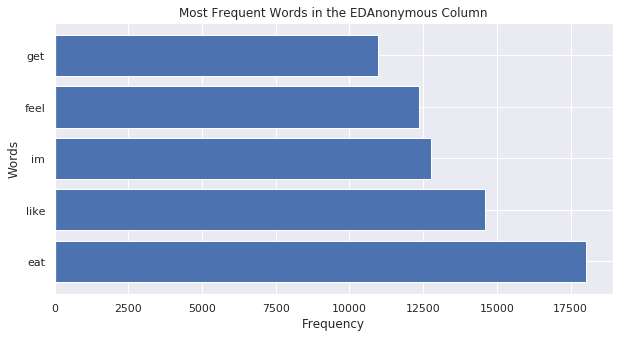

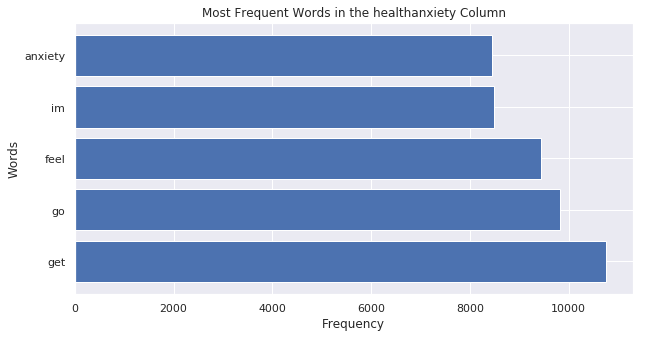

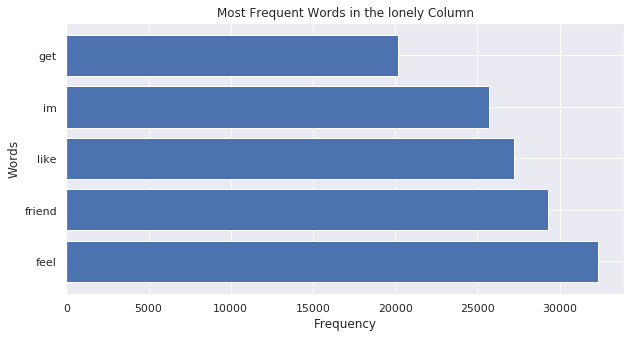

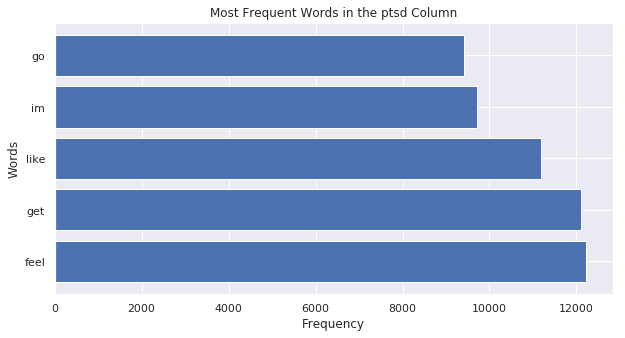

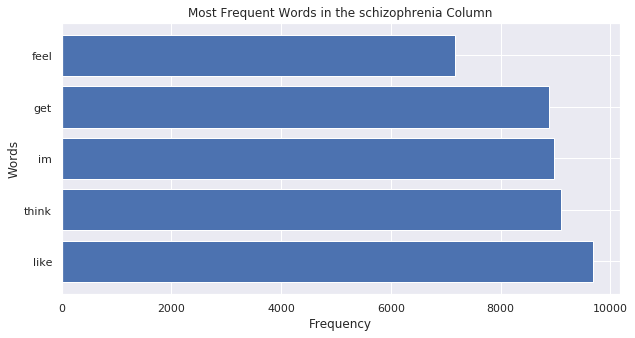

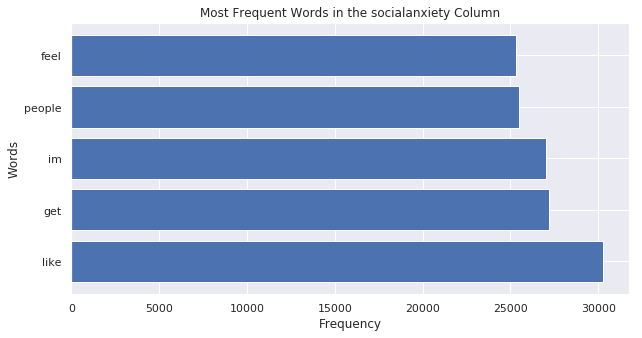

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

data = df

# Obține lista etichetelor unice
labels = data['subreddit'].unique()

# Parcurge fiecare etichetă și calculează cele mai folosite 5 cuvinte
for label in labels:
    filtered_data = data[data['subreddit'] == label]
    # Filtrarea datelor pentru eticheta curentă
    # Concatenate all the sentences from the "post" column
    all_posts = ' '.join(filtered_data['post'].values.tolist())

    # Tokenize words
    tokens = word_tokenize(all_posts)

    # Calculate word frequencies
    freq_dist = FreqDist(tokens)

    # Number of top words to display in the plot
    num_top_words = 5

    # Get the most frequent words and their frequencies
    top_words = freq_dist.most_common(num_top_words)
    top_words, frequencies = zip(*top_words)

    # Convert words to Unicode strings
    top_words = [str(word) for word in top_words]

    # Plot the horizontal bar chart of the most frequent words
    plt.figure(figsize=(10, 5))
    plt.barh(top_words, frequencies)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(r'Most Frequent Words in the {} Column'.format(label))
    plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Încărcați baza de date sau DataFrame-ul cu postările
data = df

# Calculează numărul de cuvinte pentru fiecare postare
df['totalwords'] = df['post'].str.split().str.len()

df.head()

In [ ]:
plt.hist(df['totalwords'], bins=100, edgecolor='black')

plt.xlabel("Valoare")
plt.ylabel("Frecventa")
plt.show()

In [ ]:
media = np.mean(df['totalwords'])
valoare_minima = np.min(df['totalwords'])
valoare_maxima = np.max(df['totalwords'])

In [ ]:
media

In [ ]:
valoare_maxima

In [ ]:
valoare_minima

In [ ]:

hist, bin_edges = np.histogram(df['totalwords'], bins=10)  # Calculează histograma cu 10 bin-uri

# Afișează valorile histogramelor și limitele bin-urilor
for i in range(len(hist)):
    print(r'Interval {} - {}: {}'.format(bin_edges[i],bin_edges[i+1],hist[i]))